# VERZEO PROJECT   
    Name      : U. SASIDHARAN
    E-Mail-ID : sasidharanrs03@gmail.com
    Course    : Data-Science

## PROBLEM STATEMENT:
 
Create a classification model to predict whether price range of mobile based on certain specifications

   <BR>In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning 
algorithms such as _logistic regression, SVM -Linear, RBF kernel and k-nearest neighbors(knn)_. <BR>

In [120]:
# The libraries & modules which we are going to use in this project:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [121]:
# First of all, we load given data as a csv file:
data = pd.read_csv("/Users/Lavanya udhayakumar/OneDrive/Desktop/jupyter cod/verzeo project/mobile_price_range_data.csv")
# data set will be
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [122]:
data.shape

(2000, 21)

We have 2000 samples and 21 attributes. <br>
The last attribute is a target attribute, which means that we have labeled data.

In [123]:
# To find the data of the column
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [124]:
# To find the data type of the column
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Here is the attributes of our dataset: <br>
- __id__: ID <br>
- __battery_power__: Total energy a battery can store in one time measured in mAh<br> 
- __blue__: Has bluetooth or not<br> 
- __clock_speed__: speed at which microprocessor executes instructions<br> 
- __dual_sim__: Has dual sim support or not<br> 
- __fc__: Front Camera mega pixels<br> 
- __four_g__: Has 4G or not<br> 
- __int_memory__: Internal Memory in Gigabytes<br> 
- __m_dep__: Mobile Depth in cm<br> 
- __mobile_wt__: Weight of mobile phone<br> 
- __n_cores__: Number of cores of processor<br> 
- __pc__: Primary Camera mega pixels<br> 
- __px_height__: Pixel Resolution Height<br> 
- __px_width__: Pixel Resolution Width<br> 
- __ram__: Random Access Memory in Megabytes<br> 
- __sc_h__: Screen Height of mobile in cm<br> 
- __sc_w__: Screen Width of mobile in cm<br> 
- __talk_time__: longest time that a single battery charge will last when you are<br> 
- __three_g__: Has 3G or not<br> 
- __touch_screen__: Has touch screen or not<br> 
- __wifi__: Has wifi or not<br> 
- __price_range__: This is the target variable with value of __0 (low cost)__, __1 (medium cost)__, __2 (high cost)__ and __3 (very high cost)__

In [125]:
#We do not have any null values in our dataset. It will ease the preprocessing step. 
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [126]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As mentioned above, our data have labels and we will apply supervised learning algorithms. <br> 
We define our target column as "y" and rest of the data which are used as inputs as "x".

In [127]:
y=data['price_range']
x=data.drop('price_range', axis=1)
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study. 

array([1, 2, 3, 0], dtype=int64)

Let's see our dataset is balanced or imbalanced? 
<br>    If it is imbalance dataset we want to use over-sampling and under-sampling technique's.
Because the balanced dataset has make our predictions more accurate than imbalanced dataset.<br>

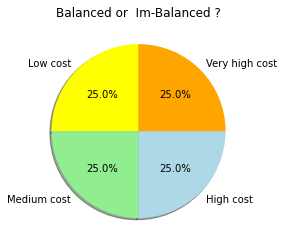

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

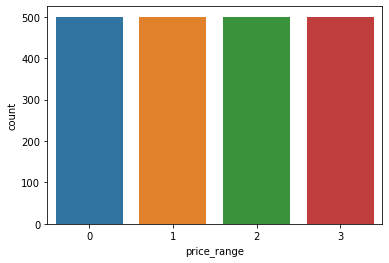

In [128]:
labels = ["Low cost", "Medium cost", "High cost", "Very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','lightgreen','lightblue', 'orange']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Balanced or  Im-Balanced ?')
plt.show()
sns.countplot(data['price_range'])
#dataset is balanced

<br> Thus the dataset is balanced<br>
<br>
We split our dataset into 'training' and 'test' datasets. And, we are going to see our models' accuracy by applying them on test dataset.  <br>

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
# check whether the split works correctly 
print(x_train.shape)
print(x_test.shape)

(1600, 20)
(400, 20)


## Data Preprocessing

<br> A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.<br>



In [130]:
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
print(x_train)
print(x_test)

[[ 0.98482338 -0.98634324  0.34554635 ...  0.56387691 -0.99875078
  -1.01257911]
 [-0.67322403  1.01384584 -1.25022721 ...  0.56387691  1.00125078
   0.98757716]
 [-0.40066829  1.01384584  0.22279454 ... -1.7734367   1.00125078
  -1.01257911]
 ...
 [ 0.69409726  1.01384584 -0.02270909 ...  0.56387691 -0.99875078
  -1.01257911]
 [ 0.83491773 -0.98634324 -1.25022721 ...  0.56387691 -0.99875078
   0.98757716]
 [ 0.41245633 -0.98634324 -0.39096452 ...  0.56387691  1.00125078
   0.98757716]]
[[ 0.28299235 -0.98634324 -1.25022721 ...  0.56387691 -0.99875078
  -1.01257911]
 [-1.4409227  -0.98634324 -1.25022721 ...  0.56387691  1.00125078
   0.98757716]
 [-1.49316255 -0.98634324 -0.1454609  ...  0.56387691 -0.99875078
   0.98757716]
 ...
 [-0.59827121  1.01384584 -1.25022721 ...  0.56387691  1.00125078
  -1.01257911]
 [-1.24104849 -0.98634324  1.45031267 ...  0.56387691  1.00125078
   0.98757716]
 [-1.26376147  1.01384584 -0.26821271 ...  0.56387691  1.00125078
  -1.01257911]]


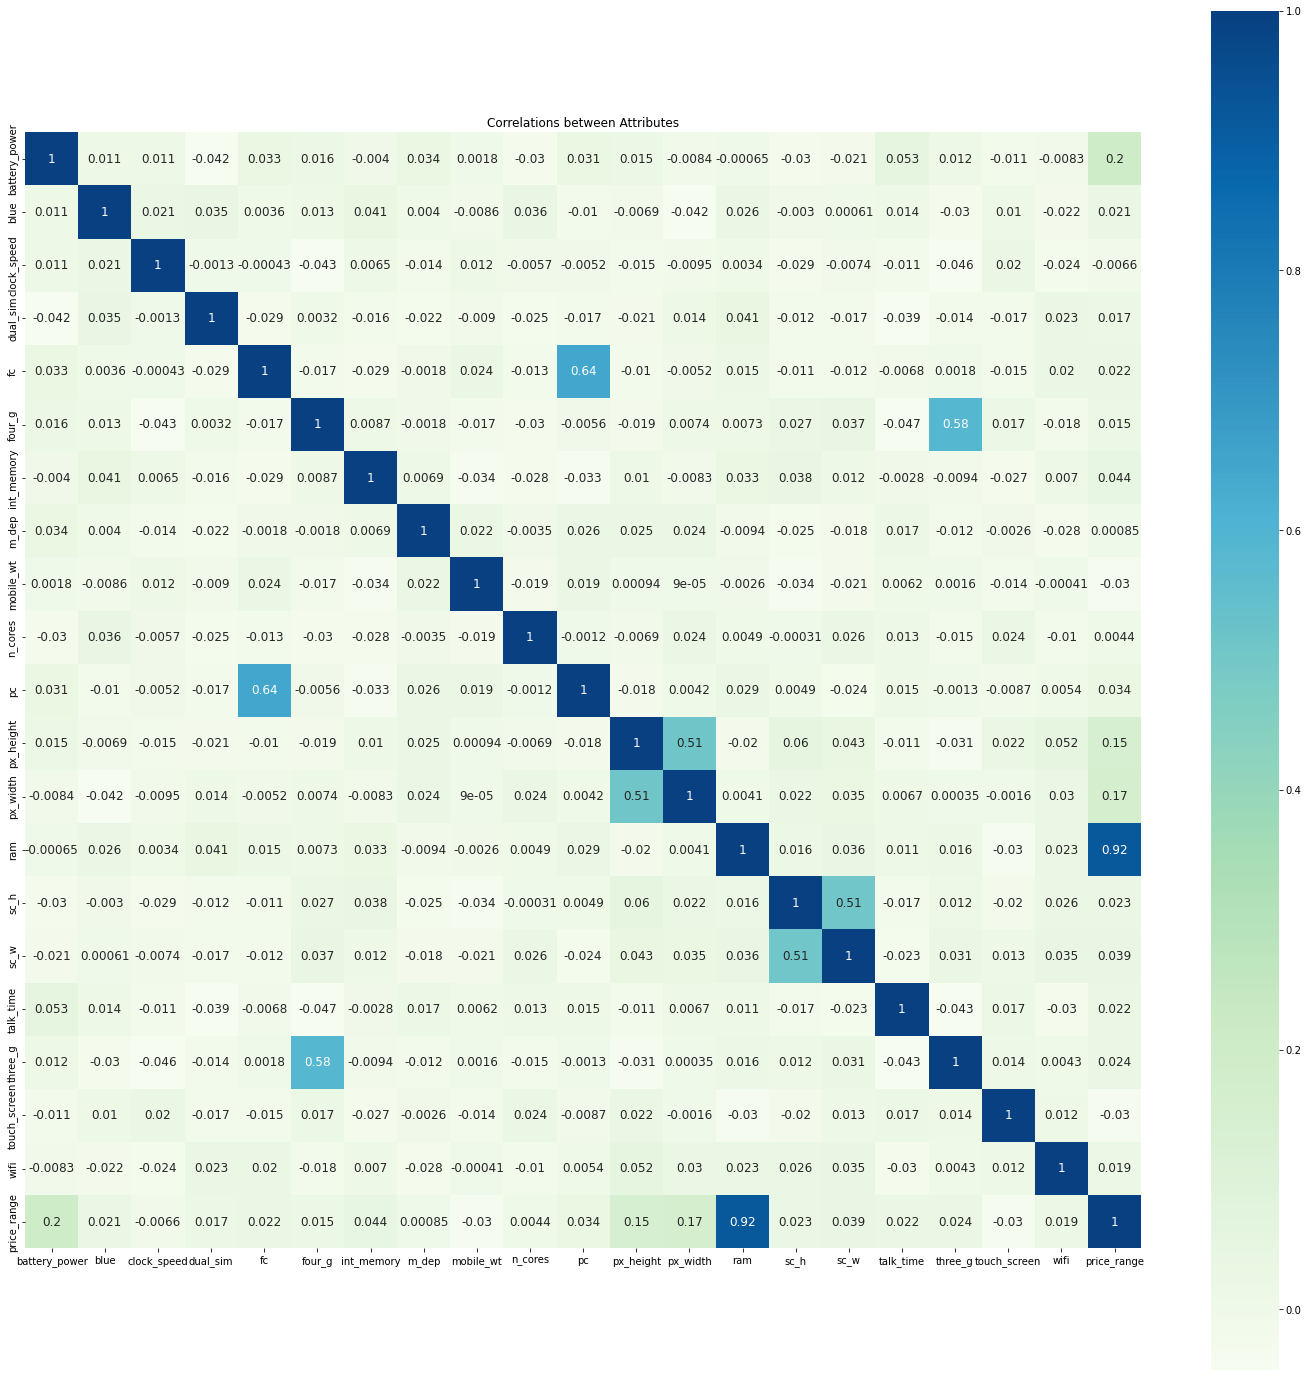

In [131]:
# Before going through machine learning applications, 
# let's see the correlation btw features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (25, 25))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 12})
plt.title('Correlations between Attributes')
plt.show ()

We see from the heatmap;
- The most influential variable is ram
- Most of the variables have very little correlation to price range
- Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect price range.
- 3G and 4G is somewhat correlated
- There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

## Implementation Of ML Algorithms


To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.
- Logistic regression
- SVM Linear Kernel
- RBF Kernel
- KNN

### Logistic Regression

<br>Target variables of the data set are discrete, hence, we are going to apply  logistic regression model.<br>

In [132]:
from sklearn.linear_model import LogisticRegression
# its a classification
lr = LogisticRegression(multi_class = 'multinomial')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)

[1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 0 1 0 0 3 1 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 3 2 3 0 1 3 3 1 0 0 3 3 3 3 1 3 2 3 2 2 3 1 3 1 0 1 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 1 2 2 2 1 0 0 3 2 0 2 0 3 2 0 2 3 0 1 3 3 0 3 0 0 2 0 1
 0 3 2 2 1 1 3 1 0 3 2 2 3 1 2 3 2 1 1 1 0 0 1 0 1 3 0 2 3 1 3 0 0 0 1 1 3
 2 0 3 1 2 2 3 2 2 0 3 2 2 2 2 2 1 2 1 1 3 3 1 2 0 3 1 3 2 2 3 2 2 1 0 1 3
 3 1 2 0 3 1 0 2 2 0 2 0 0 3 0 0 1 3 2 1 3 0 3 2 2 1 2 1 3 1 3 1 0 3 1 2 2
 3 0 2 3 3 0 3 1 1 1 0 2 1 3 1 2 1 0 1 2 1 2 0 3 3 2 3 3 1 3 1 2 3 1 0 2 0
 0 1 3 3 0 1 0 1 1 0 2 3 1 3 2 1 2 1 2 1 3 1 3 1 2 3 2 2 1 2 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 3 1 2 1 1 2 0 0 0 1 1 3 1 3 2 1 3 1 3 1 1 2 0 1 2 2 2 2
 1 0 0 2 2 1 1 2 1 3 0 0 1 0 2 3 3 2 2 2 2 0 3 2 0 0 2 0 3 3 1 0 1 0 2 0 0
 1 0 0 2 1 2 1 3 2 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 1 3 2 0 2]


## Confusion Matrix
   <br>A confusion matrix is a tabular summary of the number of 
correct and incorrect predictions made by a classifier.
It is used to measure the performance of a classification model.
It can be used to evaluate the performance of a classification 
model through the calculation of performance metrics like accuracy,
precision, recall, and F1-score.



In [133]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_pred_lr,y_test)
print(lr_acc)
print(confusion_matrix(y_pred_lr,y_test))
pd.crosstab(y_test, y_pred_lr, rownames=['Actual Class'], colnames=['Predicted Class'])

0.9275
[[ 90   2   0   0]
 [  4  98  10   0]
 [  0   2 101   2]
 [  0   0   9  82]]


Predicted Class,0,1,2,3
Actual Class,,,,
0,90,4,0,0
1,2,98,2,0
2,0,10,101,9
3,0,0,2,82


In [134]:
print(metrics.classification_report(y_test,y_pred_lr)) 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.88      0.96      0.92       102
           2       0.96      0.84      0.90       120
           3       0.90      0.98      0.94        84

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



### K-Nearest Neighbors (KNN)

   <br>'K' is the number of nearest training points which we classify them using the majority vote.<br>

In [135]:
from sklearn.neighbors import KNeighborsClassifier  
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test) 
print(metrics.confusion_matrix(y_test, y_pred_knn))
acc_knn=accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn)) 
pd.crosstab(y_test, y_pred_knn, rownames=['Actual Class'], colnames=['Predicted Class'])

[[57 30  5  2]
 [47 37 15  3]
 [33 42 26 19]
 [ 3 15 19 47]]
0.4175


Predicted Class,0,1,2,3
Actual Class,,,,
0,57,30,5,2
1,47,37,15,3
2,33,42,26,19
3,3,15,19,47


In [136]:
print(metrics.classification_report(y_test,y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.41      0.61      0.49        94
           1       0.30      0.36      0.33       102
           2       0.40      0.22      0.28       120
           3       0.66      0.56      0.61        84

    accuracy                           0.42       400
   macro avg       0.44      0.44      0.43       400
weighted avg       0.43      0.42      0.41       400



## Support Vector Machine (SVM)

<br>The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.<br>

<br> SVM can be of two types:

- Linear SVM: 
<br>Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.<br>
we use this Linear SVM Kernel Classifier.  <br>

- Non-linear SVM:
<br>Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.
we use this Radial Basis Function Kernel (RBF) Classifier  <br>



## Radial Basis Function Kernel (RBF):

  <br>          The similarity between two points in the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space. RBF is the default kernel used in SVM.<br>


In [137]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf')
rbf.fit(x_train, y_train)
y_pred_rbf = rbf.predict(x_test)
print(y_pred_rbf)

[1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 0 0 3 1 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 2 2 3 0 2 3 3 1 0 0 2 3 2 2 0 3 2 3 2 2 3 1 3 1 0 0 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 2 2 2 2 2 0 0 3 2 0 2 0 3 2 0 2 3 0 2 3 3 0 3 0 0 2 0 1
 0 3 2 1 1 1 3 1 0 3 3 2 3 1 2 3 1 1 1 1 0 0 1 0 2 3 0 2 2 1 3 0 0 0 1 1 3
 2 0 2 0 2 2 3 2 2 0 3 2 2 2 2 2 1 2 2 1 3 3 1 2 0 3 1 3 2 2 3 2 2 1 0 1 2
 2 2 2 0 3 1 0 2 2 0 3 0 0 3 0 1 2 3 2 1 3 0 3 2 2 1 2 1 3 1 3 1 0 3 1 2 2
 3 0 2 3 3 0 3 1 1 2 0 2 1 3 0 2 2 0 1 2 1 2 0 3 3 2 3 3 1 3 1 1 3 1 0 2 0
 1 1 3 3 0 1 0 2 2 0 2 3 1 3 2 1 2 1 2 1 3 2 3 1 2 3 2 2 1 3 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 2 1 2 1 1 2 0 0 0 1 1 3 1 2 2 1 3 2 3 1 2 2 0 1 2 2 2 2
 1 0 0 2 2 1 1 2 1 3 0 0 1 0 2 3 3 2 2 2 1 0 3 1 0 0 2 0 3 3 1 1 1 0 2 0 0
 1 0 0 2 1 2 1 3 1 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 0 3 2 0 3]


In [138]:
from sklearn.metrics import accuracy_score
rbf_acc = accuracy_score(y_test,y_pred_rbf)
print(rbf_acc)
print(confusion_matrix(y_test,y_pred_rbf))
pd.crosstab(y_test, y_pred_rbf , rownames=['Actual Class'], colnames=['Predicted Class'])


0.8825
[[ 89   5   0   0]
 [  4  86  12   0]
 [  0  11 101   8]
 [  0   0   7  77]]


Predicted Class,0,1,2,3
Actual Class,,,,
0,89,5,0,0
1,4,86,12,0
2,0,11,101,8
3,0,0,7,77


## Linear SVM :

In [139]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',random_state=0)
svm.fit(x_train, y_train)
y_pred_svm = rbf.predict(x_test)
print(y_pred_svm)

[1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 0 0 3 1 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 2 2 3 0 2 3 3 1 0 0 2 3 2 2 0 3 2 3 2 2 3 1 3 1 0 0 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 2 2 2 2 2 0 0 3 2 0 2 0 3 2 0 2 3 0 2 3 3 0 3 0 0 2 0 1
 0 3 2 1 1 1 3 1 0 3 3 2 3 1 2 3 1 1 1 1 0 0 1 0 2 3 0 2 2 1 3 0 0 0 1 1 3
 2 0 2 0 2 2 3 2 2 0 3 2 2 2 2 2 1 2 2 1 3 3 1 2 0 3 1 3 2 2 3 2 2 1 0 1 2
 2 2 2 0 3 1 0 2 2 0 3 0 0 3 0 1 2 3 2 1 3 0 3 2 2 1 2 1 3 1 3 1 0 3 1 2 2
 3 0 2 3 3 0 3 1 1 2 0 2 1 3 0 2 2 0 1 2 1 2 0 3 3 2 3 3 1 3 1 1 3 1 0 2 0
 1 1 3 3 0 1 0 2 2 0 2 3 1 3 2 1 2 1 2 1 3 2 3 1 2 3 2 2 1 3 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 2 1 2 1 1 2 0 0 0 1 1 3 1 2 2 1 3 2 3 1 2 2 0 1 2 2 2 2
 1 0 0 2 2 1 1 2 1 3 0 0 1 0 2 3 3 2 2 2 1 0 3 1 0 0 2 0 3 3 1 1 1 0 2 0 0
 1 0 0 2 1 2 1 3 1 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 0 3 2 0 3]


In [140]:
from sklearn.metrics import accuracy_score
svm_acc = accuracy_score(y_test,y_pred_svm)
print(svm_acc)
print(confusion_matrix(y_test,y_pred_svm))
pd.crosstab(y_test, y_pred_svm , rownames=['Actual Class'], colnames=['Predicted Class'])


0.8825
[[ 89   5   0   0]
 [  4  86  12   0]
 [  0  11 101   8]
 [  0   0   7  77]]


Predicted Class,0,1,2,3
Actual Class,,,,
0,89,5,0,0
1,4,86,12,0
2,0,11,101,8
3,0,0,7,77


## Which model is the most accurate ?

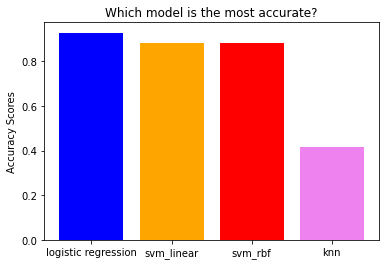

In [141]:
models = ['logistic regression', 'svm_linear', 'svm_rbf', 'knn']
acc_scores = [lr_acc,svm_acc,rbf_acc,acc_knn]

plt.bar(models, acc_scores, color=['blue', 'orange', 'red', 'violet'])
plt.ylabel("Accuracy Scores")
plt.title("Which model is the most accurate?")
plt.show()

After training our dataset with four different model, we conclude that Logistic Regression is best model for our dataset. (via the highest accuracy score = 0.927) <br>
Finally, we can run our Logistic Regression model to predict target values on the test dataset. <BR>

## Conclusion :
   <br>I have implemented a Mobile Price Prediction using different Machine Learning Algorithms. This project will classify the price range of the mobile price. The price ranges from 0-3. Now I have trained a mobile price classification using 4 ML algorithms. This model classifies the range of the mobile based on the different parameters like from camera, touch screen, cores, battery, clock speed, internal memory, battery capacity, etc. After training the model using 3 algorithms, I compared all the models using the graph.  <br>
